<a href="https://colab.research.google.com/github/Dibya069/Generative_AI-Codes-to-learn-/blob/main/Brain_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BRiGqGgUxB8DC2j3QMRi")
project = rf.workspace("education-science").project("brain-segment")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to brain-segment-3 in yolov11:: 100%|██████████| 3614/3614 [00:00<00:00, 5459.71it/s]


In [2]:
import cv2
import random
import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.random.seed(42)


In [4]:
# Define class names and colors
class_names = ['tumor']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

# Function to plot segmentation masks on the image
def plot_segmentation(image, polygons, labels):
    h, w, _ = image.shape

    for polygon_num, polygon in enumerate(polygons):
        class_name = class_names[int(labels[polygon_num])]
        color = colors[class_names.index(class_name)]

        # Denormalize the polygon points
        points = []
        for i in range(0, len(polygon), 2):
            x = int(float(polygon[i]) * w)
            y = int(float(polygon[i + 1]) * h)
            points.append([x, y])

        # Convert points to a NumPy array for OpenCV functions
        points = np.array(points, np.int32).reshape((-1, 1, 2))

        # Draw the segmentation mask
        cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
        cv2.fillPoly(image, [points], color=color)

        # Draw the class label
        centroid_x = int(np.mean(points[:, 0, 0]))
        centroid_y = int(np.mean(points[:, 0, 1]))
        font_scale = 0.5
        font_thickness = 1
        cv2.putText(image, class_name, (centroid_x, centroid_y - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return image

In [5]:
# Function to plot images with segmentation masks
def plot(image_paths, label_paths, num_samples):
    all_images = sorted(glob.glob(image_paths))
    all_labels = sorted(glob.glob(label_paths))

    if not all_images or not all_labels:
        print("Error: No images or labels found. Check the paths.")
        return

    num_images = len(all_images)
    plt.figure(figsize=(15, 12))

    for i in range(num_samples):
        idx = random.randint(0, num_images - 1)
        image = cv2.imread(all_images[idx])

        if image is None:
            print(f"Error: Could not read image {all_images[idx]}")
            continue

        polygons = []
        labels = []

        with open(all_labels[idx], 'r') as f:
            for line in f.readlines():
                elements = line.split()
                label = int(elements[0])
                polygon_points = elements[1:]  # Extract the polygon points
                polygons.append(polygon_points)
                labels.append(label)

        result_image = plot_segmentation(image, polygons, labels)
        plt.subplot(2, 2, i + 1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

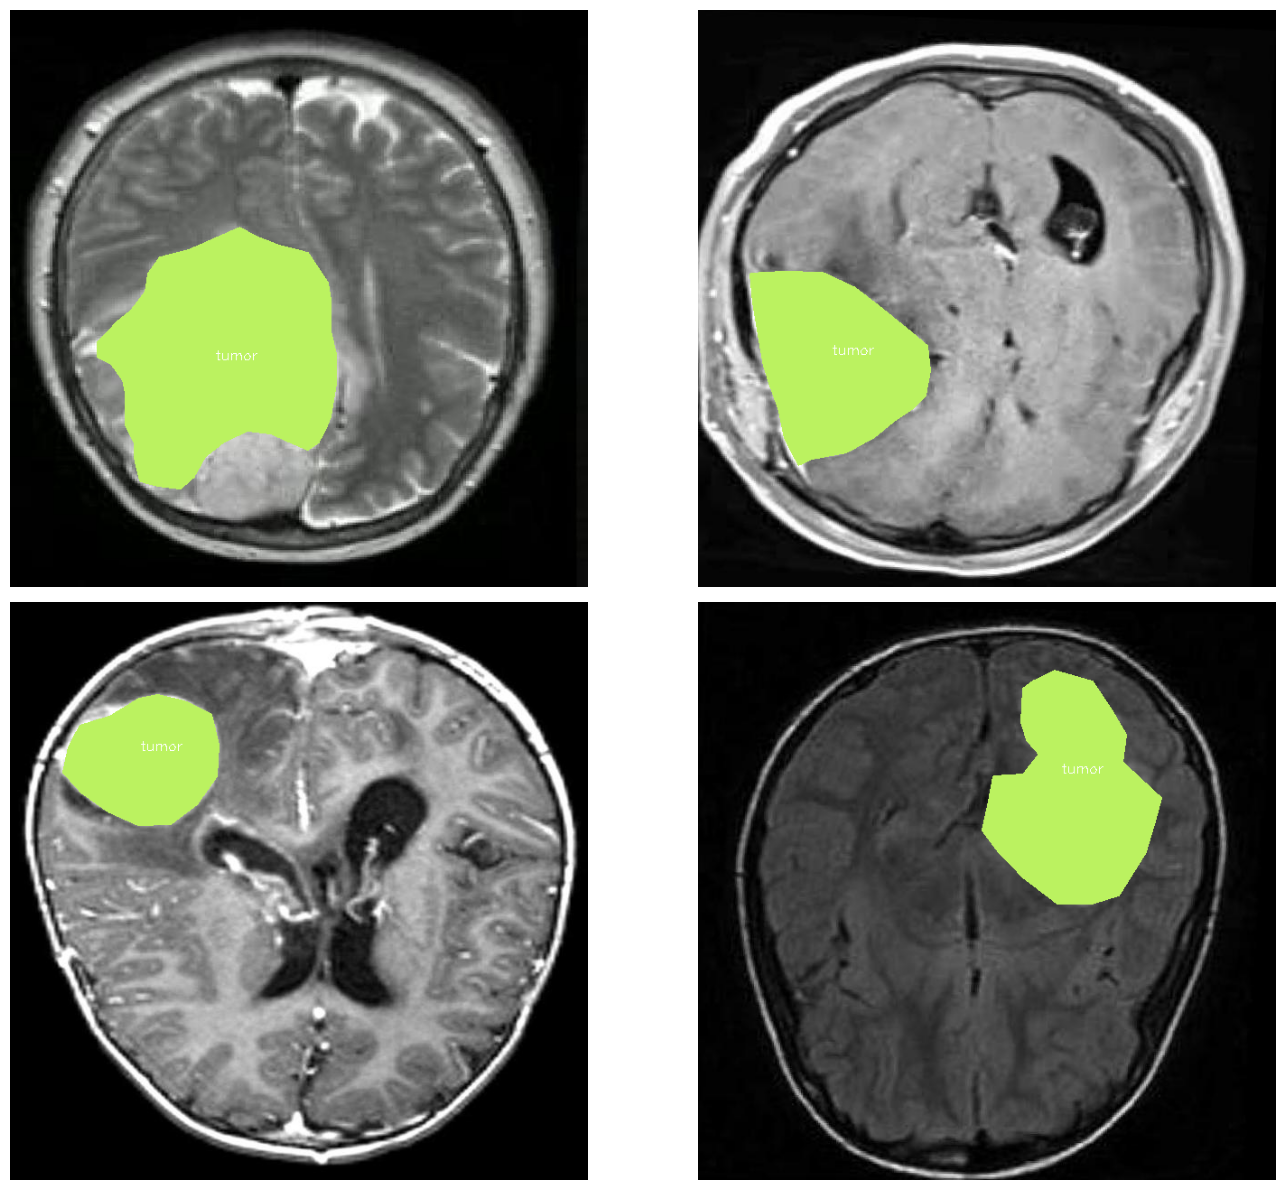

In [6]:
# Example usage
plot(
    image_paths='/content/brain-segment-3/train/images/*',
    label_paths='/content/brain-segment-3/train/labels/*',
    num_samples=4
)

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 49.2 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO
model = YOLO("yolo11n-seg.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 141MB/s]


In [9]:
train_results = model.train(
    data="/content/brain-segment-3/data.yaml",
    epochs=100, imgsz=640, patience=20, batch= -1, optimizer='auto'
)

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/brain-segment-3/data.yaml, epochs=100, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 87.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 290MB/s]


AMP: checks passed ✅


train: Scanning /content/brain-segment-3/train/labels... 1500 images, 141 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<00:00, 1646.25it/s]


train: New cache created: /content/brain-segment-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.06G allocated, 14.59G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


     2842803       10.36         0.436         77.55           nan        (1, 3, 640, 640)                    list
     2842803       20.71         0.904         34.82           nan        (2, 3, 640, 640)                    list
     2842803       41.42         1.697         37.67           nan        (4, 3, 640, 640)                    list
     2842803       82.85         3.253          59.1           nan        (8, 3, 640, 640)                    list
     2842803       165.7         6.218         75.26           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 23 for CUDA:0 9.05G/14.75G (61%) ✅


train: Scanning /content/brain-segment-3/train/labels.cache... 1500 images, 141 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/brain-segment-3/valid/labels... 201 images, 74 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<00:00, 500.70it/s]

val: New cache created: /content/brain-segment-3/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005390625), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.44G      1.114      2.325      2.437      1.209         16        640: 100%|██████████| 66/66 [00:42<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        201        128      0.564      0.404      0.505      0.347      0.564      0.404      0.488      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.37G      1.139      2.116       1.72      1.189         12        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        201        128      0.461      0.482      0.435      0.267      0.474      0.445       0.41      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.39G      1.202      2.171       1.51      1.218          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        201        128       0.22      0.133     0.0764     0.0344      0.104     0.0625      0.017    0.00703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.42G      1.125      2.031      1.223       1.18          7        640: 100%|██████████| 66/66 [00:35<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        201        128      0.337        0.5      0.281      0.158      0.317      0.484      0.259       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.41G      1.105      1.997       1.12      1.152          8        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        201        128       0.58      0.799      0.549      0.384       0.59      0.797       0.56      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.37G      1.068      1.974      1.034      1.139         11        640: 100%|██████████| 66/66 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        201        128        0.6       0.82      0.632      0.458      0.589      0.895      0.635      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.37G      1.065      1.906     0.9736       1.14          7        640: 100%|██████████| 66/66 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]


                   all        201        128      0.554      0.688      0.501      0.354      0.542      0.672      0.478      0.321

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.38G      1.049      1.931     0.9742      1.133         10        640: 100%|██████████| 66/66 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        201        128      0.665      0.875      0.677       0.51      0.653      0.867      0.669      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.38G      1.021      1.841       0.94      1.116         11        640: 100%|██████████| 66/66 [00:35<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        201        128      0.597      0.832      0.643      0.513      0.596       0.83      0.631      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.41G     0.9909      1.827      0.901      1.109          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        201        128      0.607      0.857      0.667      0.522      0.607      0.859      0.667      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.35G     0.9922      1.784     0.8774      1.101          9        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        201        128      0.689      0.674      0.629      0.487       0.64      0.734       0.64      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.35G     0.9856      1.799     0.8319      1.104          9        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        201        128      0.578      0.792      0.562      0.408      0.595      0.814      0.579      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.38G     0.9931      1.785     0.8652       1.11          5        640: 100%|██████████| 66/66 [00:41<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


                   all        201        128      0.711       0.82      0.708      0.525      0.711       0.82      0.699      0.497

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.38G     0.9473      1.706      0.822      1.086         12        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        201        128      0.626      0.878      0.652      0.527      0.626      0.878      0.649      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.34G     0.9588       1.72     0.7976      1.089         11        640: 100%|██████████| 66/66 [00:37<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        201        128      0.675      0.945      0.738      0.584       0.68      0.953      0.738      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.37G     0.9381      1.694     0.7907      1.077         10        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        201        128      0.707      0.758      0.732      0.585      0.683      0.797       0.74      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.38G     0.9365      1.675     0.7777      1.074          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        201        128      0.663      0.893      0.709      0.559      0.675      0.908      0.719      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.37G     0.9257      1.652     0.7702      1.069          8        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        201        128      0.668      0.859      0.674      0.525      0.668      0.859      0.674      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.36G      0.929      1.658     0.7605      1.072         10        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        201        128      0.605      0.875      0.622      0.509       0.61      0.883      0.626      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.36G     0.8854      1.597     0.7046      1.048         14        640: 100%|██████████| 66/66 [00:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        201        128       0.62      0.883      0.629      0.489      0.622      0.867      0.623      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.38G      0.916      1.665     0.7543      1.058          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        201        128      0.649      0.906      0.686      0.567      0.655      0.914      0.694      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.4G     0.8663      1.577     0.7197      1.042          8        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        201        128       0.62      0.922      0.659      0.537      0.625      0.922      0.664      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.32G     0.8835      1.573     0.7294      1.046         14        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        201        128      0.667      0.863       0.77       0.61      0.674      0.873      0.769      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.37G     0.8921        1.6     0.7122      1.051          8        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        201        128      0.646       0.87      0.699      0.572      0.643      0.883        0.7      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.36G     0.8766      1.595      0.697      1.049         11        640: 100%|██████████| 66/66 [00:36<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        201        128      0.713      0.833       0.81      0.671      0.713      0.833      0.805      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.38G     0.8517      1.538     0.6694      1.032         13        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        201        128      0.687      0.867      0.729      0.609        0.7      0.883      0.735      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.35G     0.8884      1.635      0.704      1.054         10        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        201        128      0.582      0.945      0.679      0.562      0.587      0.953      0.685       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.38G     0.8589      1.556     0.6807      1.037          5        640: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        201        128      0.694      0.816      0.738      0.616      0.694      0.816      0.728       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.36G     0.8674      1.547      0.669       1.05          7        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        201        128      0.615      0.859      0.643      0.519      0.615      0.859      0.648      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.38G     0.8845      1.574     0.6847      1.052          8        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        201        128      0.691      0.914      0.798      0.669      0.691      0.914      0.799       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.34G      0.853      1.546     0.6597      1.033          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all        201        128      0.686      0.891       0.74      0.609      0.692      0.898      0.749      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.37G     0.8495       1.52     0.6538       1.03          5        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        201        128      0.684      0.864       0.76      0.616       0.69      0.871      0.762      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       4.4G      0.843      1.519     0.6388      1.022         10        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        201        128      0.631       0.84      0.696      0.571       0.62      0.866       0.71      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.42G     0.8479      1.457     0.6409       1.03          8        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


                   all        201        128      0.667      0.898      0.722      0.608      0.671      0.908      0.726       0.59

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.34G      0.851      1.496     0.6308      1.024         12        640: 100%|██████████| 66/66 [00:36<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        201        128       0.69      0.914      0.833      0.699      0.696      0.922      0.834      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       4.4G     0.8266      1.467     0.6316      1.021          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        201        128      0.688      0.922      0.799      0.662      0.694       0.93      0.803      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.38G     0.8137      1.457     0.6079      1.006         12        640: 100%|██████████| 66/66 [00:35<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        201        128      0.776      0.891      0.836      0.713      0.776      0.891      0.836      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.29G       0.82      1.433     0.6091      1.007         13        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        201        128      0.747      0.898      0.846      0.712      0.747      0.898      0.846      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.36G     0.8127      1.452     0.6226      1.011          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        201        128      0.693      0.922      0.792      0.662      0.702      0.939        0.8       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.38G     0.8198      1.463     0.6093      1.013         18        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        201        128      0.691      0.926      0.805      0.674      0.691      0.926      0.806      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.27G     0.8168      1.454     0.6273      1.013          4        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


                   all        201        128      0.671      0.906      0.739      0.625      0.678      0.914      0.742      0.607

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.35G      0.839      1.488     0.6164      1.025         12        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        201        128      0.726      0.888      0.816       0.67      0.731      0.893      0.821      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.44G     0.8199      1.468      0.621      1.019          5        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        201        128      0.731      0.847      0.795      0.653      0.731      0.847      0.795      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.36G      0.788      1.381     0.5855      1.005          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        201        128      0.693      0.953      0.759      0.655      0.693      0.953      0.759       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.32G     0.7995      1.385     0.5926      1.011          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        201        128       0.71      0.867      0.761      0.645      0.713      0.875      0.761      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.38G     0.7969      1.403     0.5713     0.9948          6        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        201        128      0.728      0.891      0.846       0.71      0.734      0.898      0.852      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.34G     0.7951      1.385     0.5774      0.995         10        640: 100%|██████████| 66/66 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


                   all        201        128      0.741      0.848      0.793      0.666      0.762      0.875      0.804       0.63

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100       4.4G     0.7729      1.359     0.5606     0.9895          8        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        201        128      0.703      0.844      0.787      0.662      0.698      0.844      0.789      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.39G     0.7788      1.391     0.5588     0.9937          7        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        201        128      0.725      0.906      0.794      0.666      0.725      0.906      0.794      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.36G     0.7866      1.421       0.56      1.004         11        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        201        128      0.726       0.93      0.832      0.703      0.732      0.938      0.831      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.34G     0.7982      1.405     0.5707      1.006         14        640: 100%|██████████| 66/66 [00:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


                   all        201        128      0.726      0.883       0.82      0.685      0.727      0.898       0.82      0.682

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       4.4G     0.7741      1.388     0.5511     0.9911          9        640: 100%|██████████| 66/66 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        201        128      0.737      0.852       0.79      0.656      0.744      0.859      0.791       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.38G     0.7705      1.349     0.5402     0.9906          7        640: 100%|██████████| 66/66 [00:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        201        128      0.728      0.906      0.823      0.704      0.728      0.906      0.822      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.37G     0.7855      1.355       0.57     0.9988          7        640: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        201        128      0.713      0.828      0.714      0.585      0.692      0.878      0.717      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.38G     0.7507      1.317     0.5285     0.9768          7        640: 100%|██████████| 66/66 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]


                   all        201        128      0.746      0.953      0.827      0.698      0.746      0.953      0.826      0.684

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.37G     0.7522      1.336     0.5398     0.9824         11        640: 100%|██████████| 66/66 [00:34<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        201        128      0.747      0.899      0.847      0.719       0.74      0.892      0.841       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.37G     0.7478       1.34     0.5237     0.9818          8        640: 100%|██████████| 66/66 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        201        128      0.661      0.969      0.801      0.683      0.679      0.898      0.799       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.34G     0.7537      1.331     0.5412     0.9866          9        640: 100%|██████████| 66/66 [00:36<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        201        128      0.694      0.961      0.824      0.712      0.696      0.961      0.821      0.683
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



58 epochs completed in 0.644 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


                   all        201        128      0.747      0.898      0.846      0.712      0.747      0.898      0.846      0.696
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/segment/train



image 1/1 /content/brain-segment-3/test/images/y702_jpg.rf.16f8aefa36a78e7b9f1391375572a2cc.jpg: 640x640 2 objects, 22.3ms
Speed: 2.0ms preprocess, 22.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


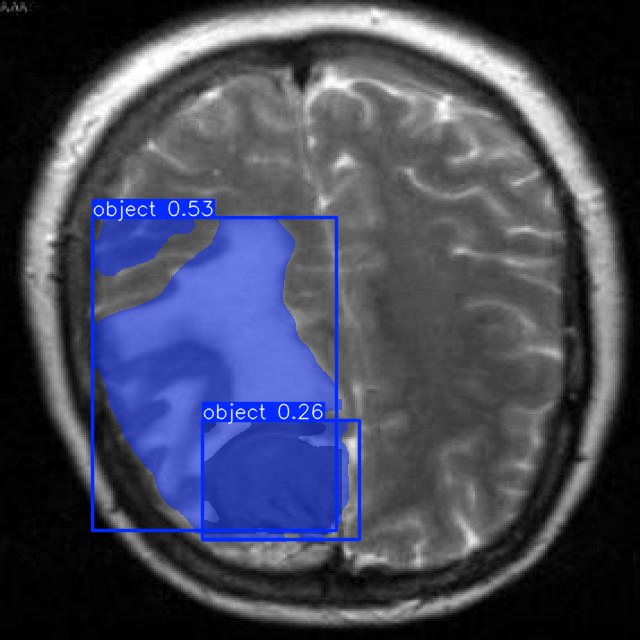

In [10]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/brain-segment-3/test/images/y702_jpg.rf.16f8aefa36a78e7b9f1391375572a2cc.jpg", save=True)
results[0].show()


image 1/1 /content/brain-segment-3/test/images/y707_jpg.rf.db5e42071e6280339fa92ca747c9e086.jpg: 640x640 1 object, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


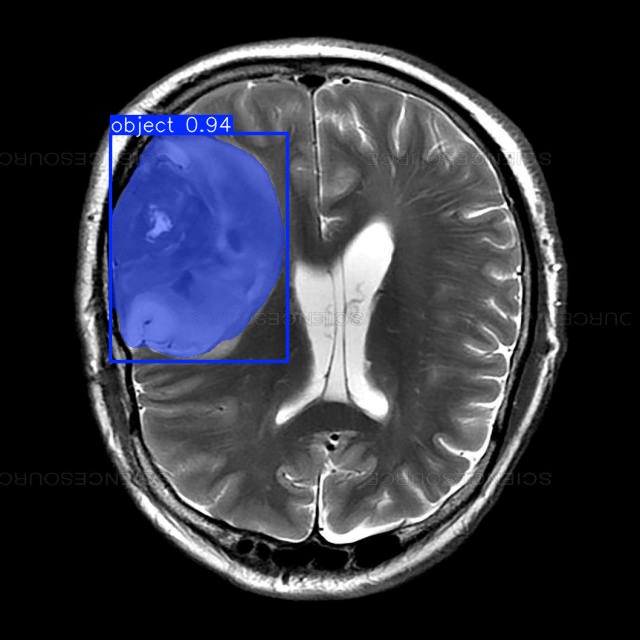

In [14]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/brain-segment-3/test/images/y707_jpg.rf.db5e42071e6280339fa92ca747c9e086.jpg", save=True)
results[0].show()

In [40]:
!zip -r brain_yolo.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/predict/ (stored 0%)
  adding: content/runs/segment/predict/y702_jpg.rf.16f8aefa36a78e7b9f1391375572a2cc.jpg (deflated 4%)
  adding: content/runs/segment/predict/y712_jpg.rf.92548c69c46a37453091896540b78b0c.jpg (deflated 8%)
  adding: content/runs/segment/predict/y733_jpg.rf.47775a95f892d150ae7e7760929a03bb.jpg (deflated 6%)
  adding: content/runs/segment/predict3/ (stored 0%)
  adding: content/runs/segment/predict3/y707_jpg.rf.db5e42071e6280339fa92ca747c9e086.jpg (deflated 6%)
  adding: content/runs/segment/predict2/ (stored 0%)
  adding: content/runs/segment/predict2/y733_jpg.rf.47775a95f892d150ae7e7760929a03bb.jpg (deflated 6%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/labels_correlogram.jpg (deflated 40%)
  adding: content/runs/segment/train/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/segment/train/MaskF1_curve.png